## HomeWork 2
### Yichi Zhang
### UNI:yz3716

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import copy
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder

%matplotlib inline

In [2]:
df = pd.read_csv('../Desktop/dataset_31_credit-g.csv')


# 1.1 Determine which features are continuous and which are categorical.

Continuous Features: 'duration','credit_amount','installment_commitment','residence_since','age','existing_credits','num_dependents'

Categorical Feature:
'class',‘checking_status','credit_hostory','purpose','saving_status','employment',
'personal_status','other_parties','property_magnitude','other_payment_plans',
'housing','job','own_telephone','foreign_worker'


In [3]:
continuous = ['duration','credit_amount','installment_commitment'
             ,'residence_since','age','existing_credits','num_dependents']

catagorical = ['checking_status', 'credit_history', 
            'purpose', 'savings_status', 'employment', 
            'personal_status', 'other_parties', 
            'property_magnitude', 'other_payment_plans', 
            'housing', 'job', 'own_telephone', 'foreign_worker']

# 1.2 Visualize the univariate distribution of each continuous feature, and the distribution of the target.

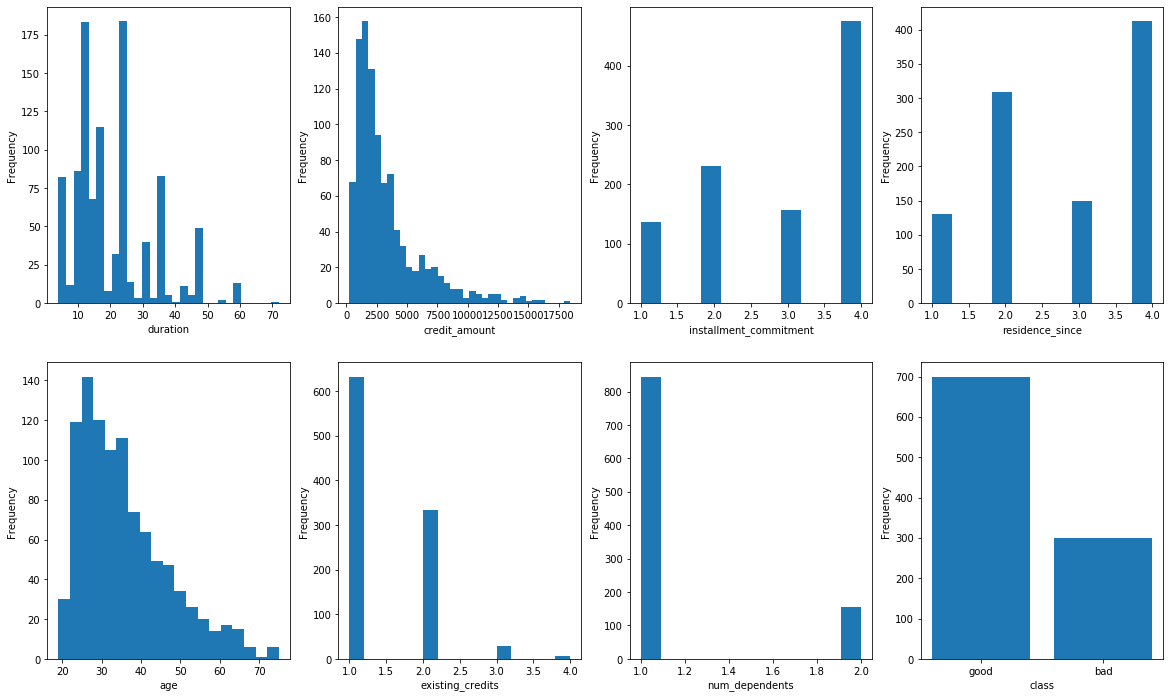

In [4]:

fig,ax = plt.subplots(2,4, figsize=(20,12))

for i in range(len(continuous)):
    if i < 4:
        ax[0,i].hist(df[continuous[i]], bins="auto")
        ax[0,i].set_xlabel(continuous[i])
        ax[0,i].set_ylabel('Frequency')
        
    else:
        ax[1,i-4].hist(df[continuous[i]], bins="auto")
        ax[1,i-4].set_xlabel(continuous[i])
        ax[1,i-4].set_ylabel('Frequency')

ax[1,3].bar(df['class'].unique(),df['class'].value_counts())
ax[1,3].set_ylabel('Frequency')
ax[1,3].set_xlabel('class')


#df['class']

plt.show()

# 1.3 Split data into training and test set. Do not use the test set until a final evaluation in 1.5. Preprocess the data (such as treatment of categorical variables) without using a pipeline and evaluate an initial LogisticRegression model with an training/validation split.

In [5]:
y = df['class']
X = df.loc[:, df.columns != 'class']
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y,stratify = y,random_state = 133 )

X_train = X_trainval.copy(deep = True)
y_train = y_trainval.copy(deep = True)




scaler = StandardScaler()

X_trainval[continuous] = scaler.fit_transform(X_trainval[continuous])


X_trainval = pd.get_dummies(X_trainval)
y_trainval = y_trainval.astype("category").cat.codes

X_train2, X_val, y_train2, y_val = train_test_split(X_trainval, y_trainval,stratify = y_trainval)

logreg = LogisticRegression()
logreg.fit(X_train2,y_train2)
score = logreg.score(X_val,y_val)

score

0.7872340425531915

# 1.4 Use ColumnTransformer and pipeline to encode categorical variables (your choice of OneHotEncoder or another one from the categorical_encoder package, or both). Evaluate Logistic Regression, linear support vector machines and nearest neighbors using cross-validation. How different are the results? How does scaling the continuous features with StandardScaler influence the results?

In [6]:
#1.4
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_selector
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier



preprocess = make_column_transformer(
    (OneHotEncoder(), make_column_selector(dtype_include='object')),
    remainder = StandardScaler())

In [7]:
#X_train, X_test, y_train, y_test = train_test_split(X, y,stratify = y)




scoresLog = cross_val_score(make_pipeline(preprocess, LogisticRegression()),
                         X_train, y_train, cv=10)
scoresLSVC = cross_val_score(make_pipeline(preprocess, LinearSVC()),
                         X_train, y_train, cv=10)
scoresKNN = cross_val_score(make_pipeline(preprocess, KNeighborsClassifier()),
                X_train, y_train, cv=10)


In [8]:
print('LogisitcRegression Mean Score of Cross Validation: '+ 
      str(np.mean(scoresLog)))
print('Linear Support Vector Machines Mean Score of Cross Validation: '+
      str(np.mean(scoresLSVC)))
print('K Nearst Neighbors Mean Score of Cross Validation: '+
      str(np.mean(scoresKNN)))

LogisitcRegression Mean Score of Cross Validation: 0.7626666666666668
Linear Support Vector Machines Mean Score of Cross Validation: 0.7573333333333333
K Nearst Neighbors Mean Score of Cross Validation: 0.744


In [9]:
preprocessUnStandrad = make_column_transformer(
    (OneHotEncoder(), make_column_selector(dtype_include='object')),
    remainder = 'passthrough')

#make_column_selector(dtype_include='object')

UscoresLog = cross_val_score(make_pipeline(preprocessUnStandrad, LogisticRegression()),
                         X_train, y_train, cv=10)
UscoresLSVC = cross_val_score(make_pipeline(preprocessUnStandrad, LinearSVC()),
                         X_train, y_train, cv=10)
UscoresKNN = cross_val_score(make_pipeline(preprocessUnStandrad, KNeighborsClassifier()),
                X_train, y_train, cv=10)

print('LogisitcRegression Mean Score of Cross Validation: '+ 
      str(np.mean(UscoresLog)))
print('Linear Support Vector Machines Mean Score of Cross Validation: '+
      str(np.mean(UscoresLSVC)))
print('K Nearst Neighbors Mean Score of Cross Validation: '+
      str(np.mean(UscoresKNN)))

LogisitcRegression Mean Score of Cross Validation: 0.7573333333333333
Linear Support Vector Machines Mean Score of Cross Validation: 0.5813333333333334
K Nearst Neighbors Mean Score of Cross Validation: 0.648


We can see that, without the scaling of data, the mean cross validation score of Logisitcregression only decrease a little. But the scores for Linear Support Vector Machine and k nearest neighbors decrease a lot. The reason is that, the algorithm of Linear Support Vector Machine and K nearest neighbors calculate the distance between each point and the distances between the points are sensitive to the scale of features. However, the algorithm of logistic regression doesn't depdent the scale of features.

# 1.5 Tune the parameters using GridSearchCV. Do the results improve? Evaluate only the be model on the test set. Visualize the performance as function of the parameters for all three models.

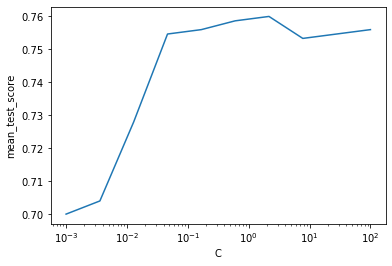

{'logisticregression__C': 2.1544346900318843}
Predictiong Score: 0.772


In [10]:
#Logisitc Regression Tunning Hyperparameter
gridLog = GridSearchCV(make_pipeline(preprocess,LogisticRegression()),
            param_grid={'logisticregression__C': np.logspace(-3, 2, 10)},
            cv=10)


gridLog.fit(X_train,y_train)

fig1,ax1 = plt.subplots()
ax1.plot(np.logspace(-3, 2,10),gridLog.cv_results_['mean_test_score'])
ax1.set_xscale('log')
ax1.set_xlabel('C')
ax1.set_ylabel('mean_test_score')


plt.show()

print(gridLog.best_params_)
print('Predictiong Score: ' + str(gridLog.score(X_test, y_test)))


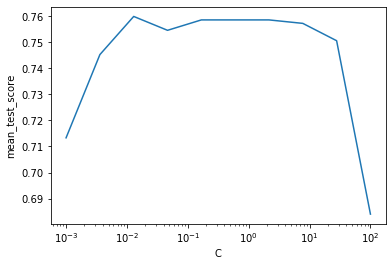

{'linearsvc__C': 0.01291549665014884}
Predictiong Score: 0.78


In [11]:
#LinearSVC Tunning Hyperparameter
gridLinearSVC = GridSearchCV(make_pipeline(preprocess,LinearSVC()),
            param_grid={'linearsvc__C': np.logspace(-3, 2, 10)},
            cv=10)


gridLinearSVC.fit(X_train,y_train)

fig2,ax2 = plt.subplots()
ax2.plot(np.logspace(-3, 2,10),gridLinearSVC.cv_results_['mean_test_score'])
ax2.set_xscale('log')
ax2.set_xlabel('C')
ax2.set_ylabel('mean_test_score')


plt.show()

print(gridLinearSVC.best_params_)
print('Predictiong Score: ' + str(gridLinearSVC.score(X_test, y_test)))


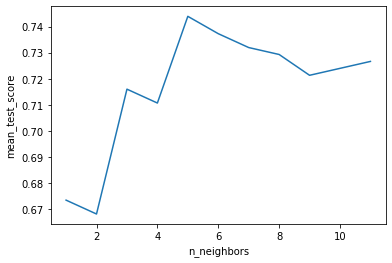

{'kneighborsclassifier__n_neighbors': 5}
Predictiong Score: 0.728


In [12]:
#KNN Tunning Hyperparameter

gridKNN = GridSearchCV(make_pipeline(preprocess,KNeighborsClassifier()),
            param_grid={'kneighborsclassifier__n_neighbors': np.arange(1,12)},
            cv=10)


gridKNN.fit(X_train,y_train)


fig3,ax3 = plt.subplots()
ax3.plot(np.arange(1,12),gridKNN.cv_results_['mean_test_score'])
ax3.set_xlabel('n_neighbors')
ax3.set_ylabel('mean_test_score')



plt.show()

print(gridKNN.best_params_)
print('Predictiong Score: ' + str(gridKNN.score(X_test, y_test)))

After we tunning the parameter, the score of our model doesn't increase a lot. All three model only increase about 2-3 percent in the performance. I think the reason that the score didn't increase a lot becuase we only tune one parameter. If we tune more, maybe we can improve the performance of our models more. 

# 1.6 Change the cross-validation strategy from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters that are found change? Do they change if you change the random seed of the shuffling? Or if you change the random state of the split into training and test data?

In [13]:
#1.6

#Logisitc Regression

from sklearn.model_selection import KFold



#kfold without shuffling
kf1 = KFold(n_splits=10, random_state= None, shuffle=False)

#kfold with shuffling
kf2 = KFold(n_splits=10, random_state=144, shuffle=True)

gridLogS1 = GridSearchCV(make_pipeline(preprocess,LogisticRegression()),
            param_grid={'logisticregression__C': np.logspace(-3, 2, 10)},
            cv=kf1)


gridLogS1.fit(X_train,y_train)


gridLogS2 = GridSearchCV(make_pipeline(preprocess,LogisticRegression()),
            param_grid={'logisticregression__C': np.logspace(-3, 2, 10)},
            cv=kf2)


gridLogS2.fit(X_train,y_train)


print(gridLogS1.best_params_)
print(gridLogS1.score(X_test, y_test))


print(gridLogS2.best_params_)
print(gridLogS2.score(X_test, y_test))


{'logisticregression__C': 0.1668100537200059}
0.784
{'logisticregression__C': 2.1544346900318843}
0.772


In [14]:
#LinearSVC


gridLinearSVCS1 = GridSearchCV(make_pipeline(preprocess,LinearSVC()),
            param_grid={'linearsvc__C': np.logspace(-3, 2, 10)},
            cv=kf1)


gridLinearSVCS1.fit(X_train,y_train)

gridLinearSVCS2 = GridSearchCV(make_pipeline(preprocess,LinearSVC()),
            param_grid={'linearsvc__C': np.logspace(-3, 2, 10)},
            cv=kf2)


gridLinearSVCS2.fit(X_train,y_train)


print(gridLinearSVCS1.best_params_)
print(gridLinearSVCS1.score(X_test, y_test))


print(gridLinearSVCS2.best_params_)
print(gridLinearSVCS2.score(X_test, y_test))

{'linearsvc__C': 0.01291549665014884}
0.78
{'linearsvc__C': 7.742636826811277}
0.78


In [ ]:
#KNN


gridKNNS1 = GridSearchCV(make_pipeline(preprocess,KNeighborsClassifier()),
            param_grid={'kneighborsclassifier__n_neighbors': np.arange(1,12)},
            cv=kf1)


gridKNNS1.fit(X_train,y_train)



gridKNNS2 = GridSearchCV(make_pipeline(preprocess,KNeighborsClassifier()),
            param_grid={'kneighborsclassifier__n_neighbors': np.arange(1,12)},
            cv=kf2)


gridKNNS2.fit(X_train,y_train)


print(gridKNNS1.best_params_)
print(gridKNNS1.score(X_test, y_test))


print(gridKNNS2.best_params_)
print(gridKNNS2.score(X_test, y_test))



According to the output of three model above, we can see that, using the k-fold without shuffling doesn't change affect the predict score of our model(stratified k-fold). Only for the logistic regression, the prediction score incrase about 0.06. And if we change from the k-fold without shuffling to k-fold with shuffling, the best parameter will change. But the predict score wilkl not change a lot. 

I adjusted the random state in k-fold and the train-test split in 1.3 several times, the prediction score for each model doesn't change a lot, but the best parameter always change.

# 1.7 Visualize the 20 most important coefficients for LogisticRegression and Linear Support Vector Machines using hyper-parameters that performed well in the grid-search.

In [ ]:
#1.7
X_temp = preprocess.fit_transform(X_train)
feature_names = preprocess.transformers_[0][1].get_feature_names().tolist()+X_train[continuous].columns.tolist()
coefficientsLog = list(zip(feature_names,gridLogS1.best_estimator_[1].coef_[0]))
VisCoeffLog = sorted(coefficientsLog, key = lambda x: abs(x[1]),reverse=True)



coefficientsSVC = list(zip(feature_names,gridLinearSVCS1.best_estimator_[1].coef_[0]))
VisCoeffSVC = sorted(coefficientsSVC, key = lambda x: abs(x[1]),reverse=True)

FeaturesLog = []
CoeffLog = []
FeaturesSVC = []
CoeffSVC = []
for i in range(20):
    FeaturesLog.append(VisCoeffLog[i][0])
    CoeffLog.append(VisCoeffLog[i][1])
    FeaturesSVC.append(VisCoeffSVC[i][0])
    CoeffSVC.append(VisCoeffSVC[i][1])


    
fig1,ax1 = plt.subplots(1,2, figsize=(30,15))

ax1[0].barh(FeaturesLog,CoeffLog)
ax1[0].invert_yaxis()
ax1[0].set_title('Log')

ax1[1].barh(FeaturesSVC,CoeffSVC)
ax1[1].invert_yaxis()
ax1[1].set_title('SVM')

plt.show()



According to the two graph above,there are lots of features that both models agree on. Like 'no_checking','check_status <0','new car','used car'..... Which means that those features indeed important to predict the credit of people.